<a href="https://colab.research.google.com/github/soumaya287/plotting-trees/blob/main/Decision_Tree_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree


A Decision Tree model can be used to visually and explicitly represent decisions and decision making.

But how is that?

# Tree Explanation
A decision tree is a set of hierarchical decisions which eventually give us a final result.

The result can be a regression prediction or a classification.

If we visualize the set of decisions, we can clearly see the shape of the Tree but it’s upside down.



<img src="https://imgur.com/o3IEoQI.png" alt="Drawing" style="width:400px;"/>

# Decision Tree Structure
Decision Tree is composed of :

* Root Node: represents the topmost node.

* Internal Nodes: denotes a test in form of a question about our features.

* Branches: represent an outcome of the test, based on these answers the tree splits.

* Leaf Nodes: represents a classification or decision. In this example: Survived or Died.



<img src="https://imgur.com/dbEBfXA.png" alt="Drawing" style="width:400px;"/>

# Decision Tree Concept
Now that we have learned the Decision Tree structure let’s try to build our decision tree :

* At each node we will try to do a binary-split and select then the best feature that gives us the optimal binary-split.

* In this example: We have 3 features: Gender, Age, and SibSb so we will have 3 candidate splits.

Note here that SibSb refers to Siblings and spouses

But how do we decide which split is optimal?

<img src="https://imgur.com/dbEBfXA.png" alt="Drawing" style="width:400px;"/>

# Optimal Split
To determine which split is the most optimal one, we have to calculate how much each split will cost us in terms of accuracy.

For that, we will use a cost function.

The split that costs least is chosen since we always want to maximize our accuracy

In our example, the best split is the sex of the passenger.



# Gini Impurity
As we have said previously, the best split is chosen using a cost function:

There are a lot of cost functions that we can use but the most common one is Gini impurity:

Gini impurity quantifies the purity of the node/leaf. A Gini score greater than zero implies that samples contained within that node belong to different classes.

**!!useful link : https://blog.quantinsti.com/gini-index/

# Pruning
The final step in creating our Tree is the shortening of its branches, this process is called Pruning to avoid overfitting.

The Pruning can be done by reducing the number of leaf nodes or by reducing the depth of the tree to build a generalized tree.


<img src="https://imgur.com/uYe2exn.png" alt="Drawing" />

# Decision Tree Code
Let's try and implement a decision tree: We will be working on Titanic [Dataset]
<br> !!! example on kaggle: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook
<br> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [1]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv("titanic-passengers.csv", sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

# Decision Tree Prediction

In [2]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [3]:
#features extraction
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
clf= tree.DecisionTreeClassifier()  
clf.fit(x_train, y_train)   #fitting our model
y_pred=clf.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7597765363128491


# Decision Tree Vizualisation

https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
https://www.programcreek.com/python/example/84807/sklearn.tree.export_graphviz
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

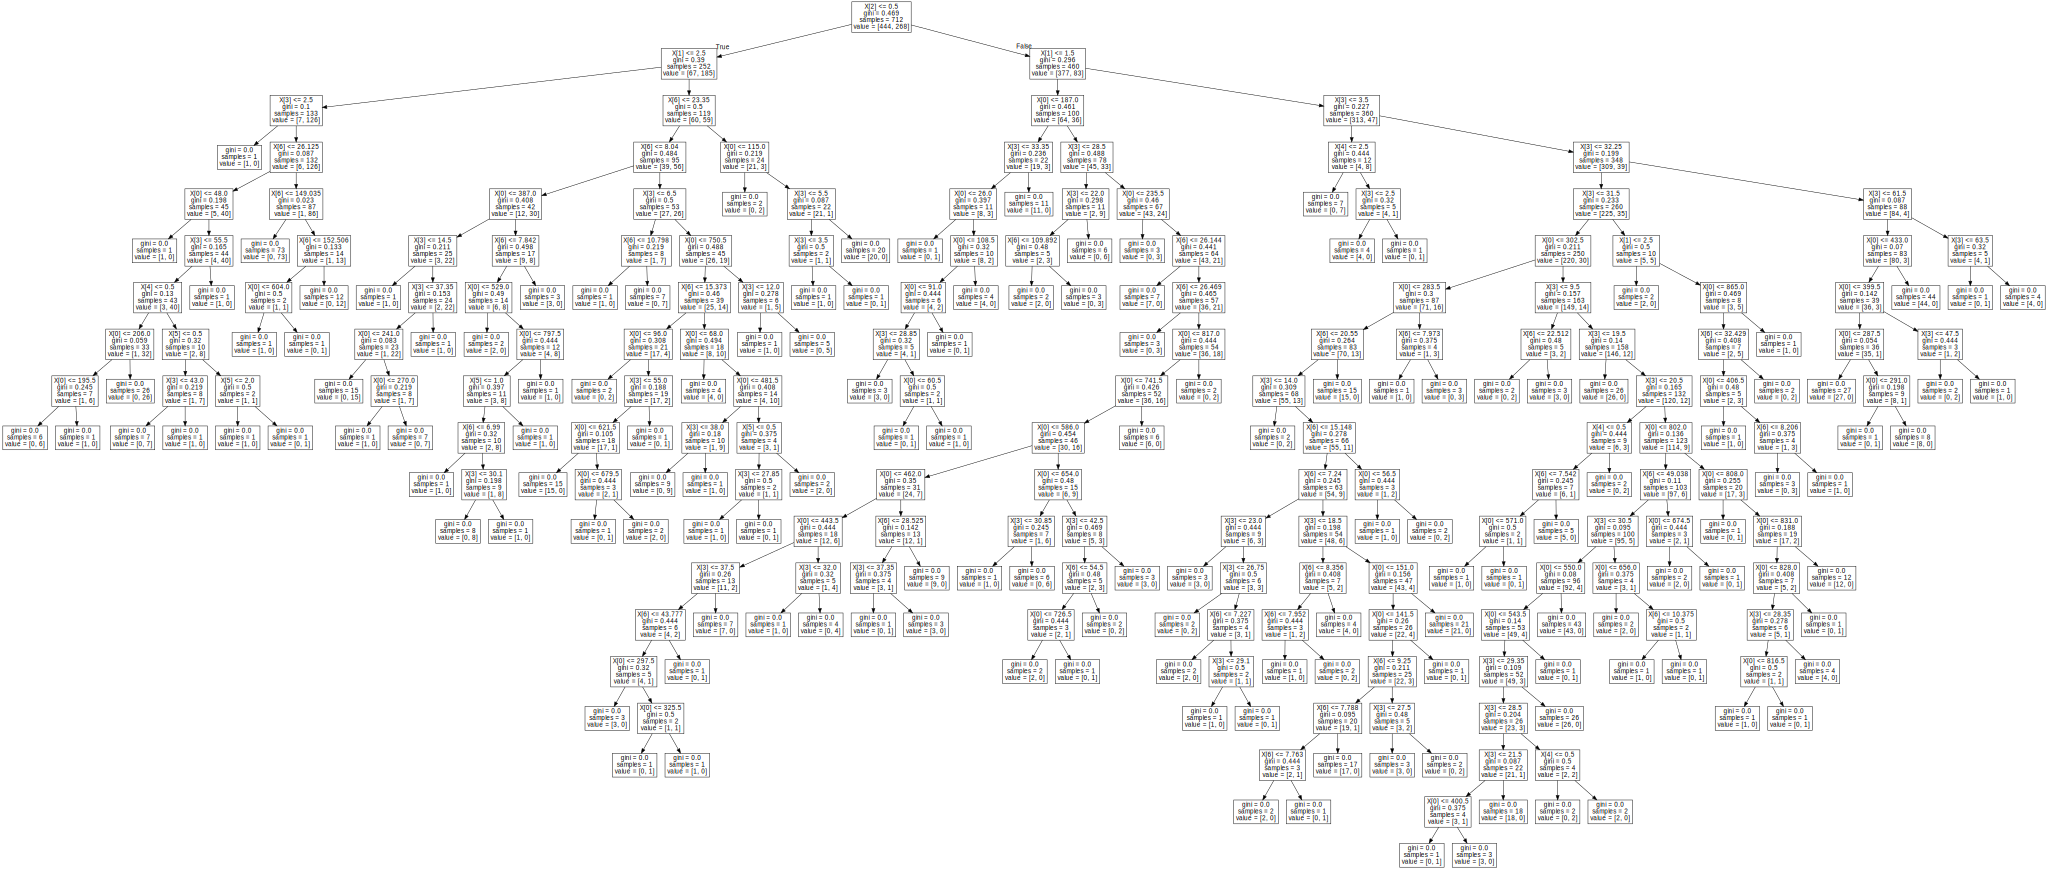

In [5]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


<img src="https://imgur.com/uj36efi.png" alt="Drawing" />

# Decision Tree Pruning Code
https://statinfer.com/204-3-10-pruning-a-decision-tree-in-python/

<img src="https://imgur.com/AwNGPTw.png" alt="Drawing" />

In [6]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(x_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=None, splitter='random')
predict3 = dtree.predict(x_train)
print(predict3)

[0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1
 0 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 

# Decision Tree Pros
* Easy to understand and interpret. At each node, we can see exactly what decision our model is making.

* Can handle numerical and categorical data.

* Doesn't require a lot of preprocessing.

https://dhirajkumarblog.medium.com/top-5-advantages-and-disadvantages-of-decision-tree-algorithm-428ebd199d9a

# Decision Tree Cons
* Calculations can become challenging when there are many target labels and features.

* Decision-tree learners can create overly complex trees that do not generalize the data well which means they suffer from Overfitting.

https://www.quora.com/What-are-the-disadvantages-of-using-a-decision-tree-for-classification

# RECAP
*A tree is composed of Internal Nodes, branches, and leaf nodes.

*To determine which is the optimal split, we need to minimize the cost function.

*The cost function is Gini Impurity which quantifies the purity of the node/leaf.

*Pruning is used to avoid overfitting by reducing the number of leaf nodes.

*Decision tree is robust to outliers.

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

# Bagging
Bagging is used to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
<img src="https://imgur.com/KHwp7vV.png" alt="Drawing" width=400 />

# Bagging Bootstraping
The first step in Bagging is to apply Bootstrapping which is a sampling technique.

We use Bootstrapping to create random subsets with N samples from the original Dataset.

The N samples are chosen with replacements(duplicates), which means while creating the subset, we can use more than one time the same sample.

<img src="https://imgur.com/S9m6lRs.png" alt="Drawing" width=400 />

https://corporatefinanceinstitute.com/resources/knowledge/other/bagging-bootstrap-aggregation/

# Bagging Aggregating
The second step is to apply on each random subset a Decision Tree Algorithm.

The average of all the predictions from different trees is taken as the final output.

<img src="https://imgur.com/IWZn0sb.png" alt="Drawing" width=400 />

https://medium.com/@harishkandan95/bagging-the-skill-of-bagging-bootstrap-aggregating-83c18dcabdf1
